In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [57]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [58]:
keyword_null = train["keyword"].isnull().sum()
location_null = train["location"].isnull().sum()
print("keyword_null", keyword_null)
print("location_null", location_null)

keyword_null 61
location_null 2533


In [59]:
# ID is useless for us 
train.drop("id", axis= 1, inplace= True)
train.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [60]:
import string 
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


#Library for Splitting Dataset
from sklearn.model_selection import train_test_split


#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:
from collections import Counter


target_count = Counter(train['target'])
print("True", target_count[1])
print("False", target_count[0])

True 3271
False 4342


In [62]:
train.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_98061/529662258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='deep')


Text(0.5, 0, 'Count of Keywords')

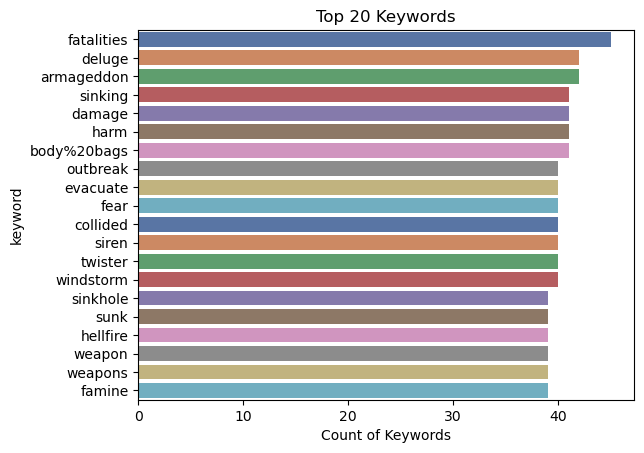

In [63]:
chains=train['keyword'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Top 20 Keywords")
plt.xlabel("Count of Keywords")

/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_98061/3148579893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_98061/3148579893.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_d")


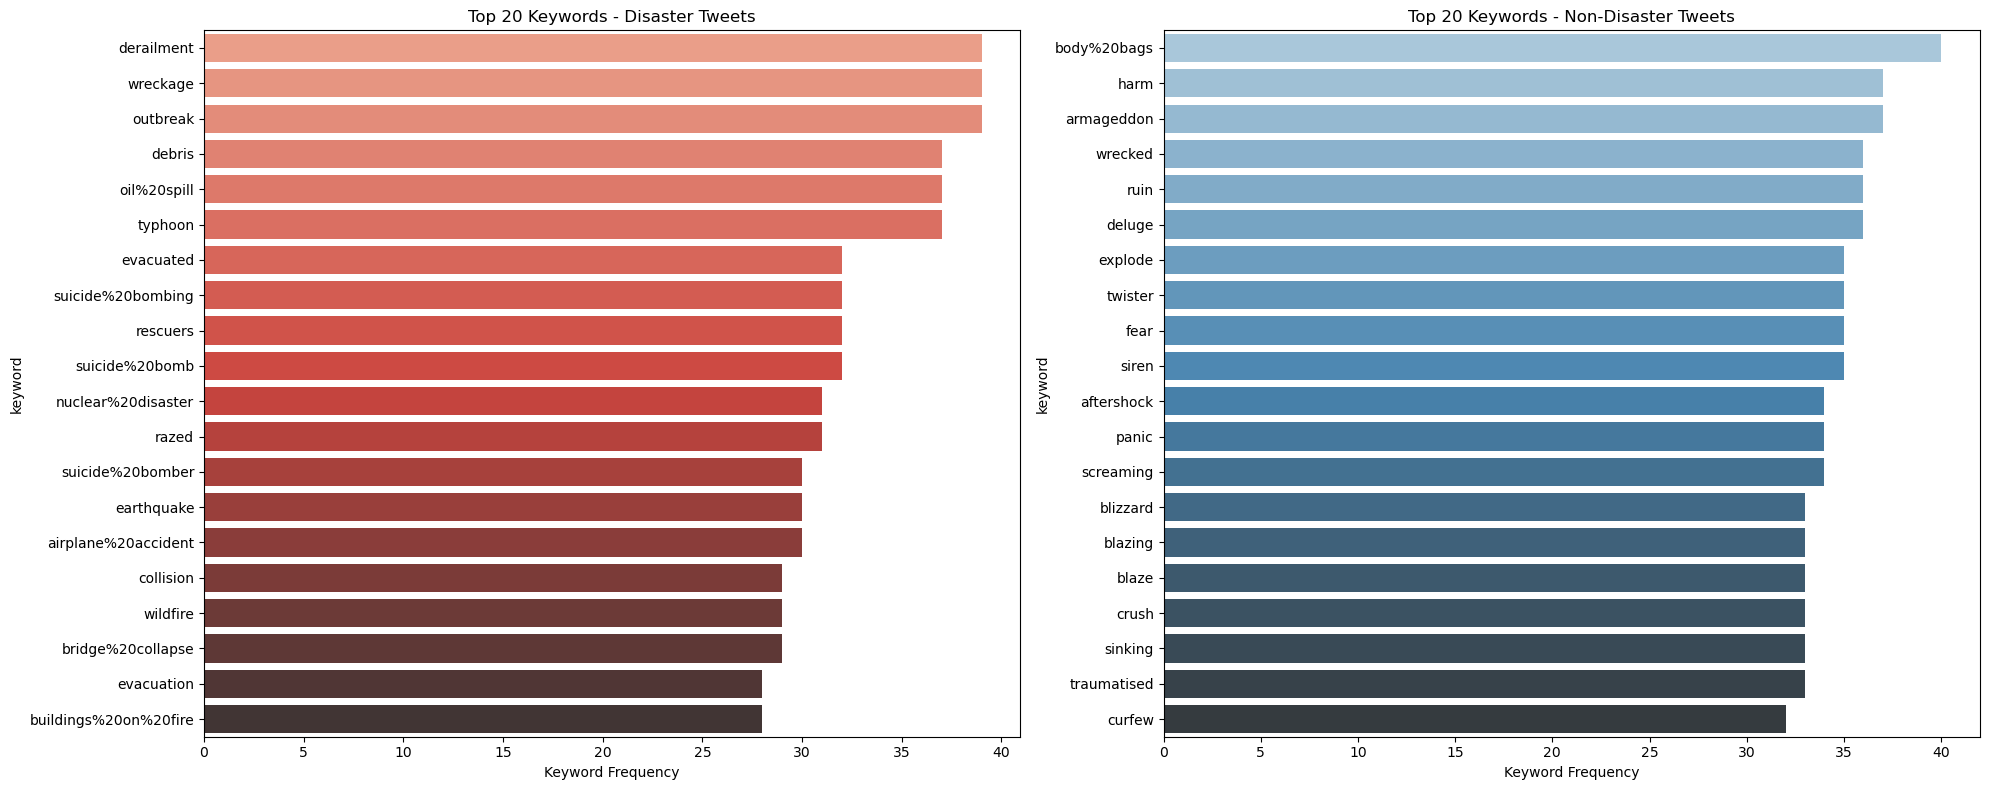

In [64]:
disaster_keywords = train.loc[train["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = train.loc[train["target"] == 0]["keyword"].value_counts()
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")


plt.tight_layout()
plt.show()

Text(0, 0.5, 'number of tweets')

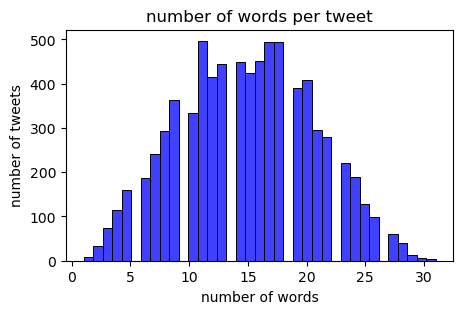

In [65]:
# CREATE A COL FOR NUMBER OF WORDS PER TWEET

def word_count(text):
    return len(text.split())

train["word_count"] = train["text"].apply(word_count)

# graph the number of words of a tweet with the number of tweets

plt.figure(figsize= (5, 3))
sns.histplot(train["word_count"], color = 'blue')
plt.title("number of words per tweet")
plt.xlabel("number of words")
plt.ylabel("number of tweets")

In [66]:
# need to clean our text from punctuations

def clean(text):
    clean_text = [char for char in text if char not in string.punctuation]
    clean_text = ''.join(clean_text)
    return clean_text

In [67]:
train['clean_text'] = train['text'].apply(clean)
train.head()

,keyword,location,text,target,word_count,clean_text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,Our Deeds are the Reason of this earthquake Ma...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,Forest fire near La Ronge Sask Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,All residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,13000 people receive wildfires evacuation orde...
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,Just got sent this photo from Ruby Alaska as s...


In [68]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
        "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [69]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL', text)

def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)
# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)


In [70]:
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # replace abbreviations, @ and number
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
  
    return text

In [71]:
train["clean_text"] = train["clean_text"].apply(clean_tweet)
train.head()

,keyword,location,text,target,word_count,clean_text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,Our Deeds are the Reason of this earthquake Ma...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,Forest fire near La Ronge Sask Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,All residents asked to shelter in place are be...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,NUMBER people receive wildfires evacuation ord...
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,Just got sent this photo from Ruby Alaska as s...


In [72]:
def toremove_stopword(text):
    remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return remove_stopword

In [73]:
nltk.download('stopwords')
train['clean_text'] = train['clean_text'].apply(toremove_stopword)
train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,keyword,location,text,target,word_count,clean_text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,"[residents, asked, shelter, place, notified, o..."
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,"[NUMBER, people, receive, wildfires, evacuatio..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


In [74]:
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train['clean_text'].values)
X = tokenizer.texts_to_sequences(train['clean_text'].values)
X = pad_sequences(X)

In [90]:
y = train["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 41)

In [91]:
# BUILDING THE MODEL 
embed = 32 
lstm = 32
model = Sequential(layers=[
    Embedding(max_features, embed, input_length=X.shape[1]),
    Dropout(0.2),
    LSTM(lstm, dropout=0.2, recurrent_dropout=0.4),
    Dense(1, activation='sigmoid')
])
opt = optimizers.Adam(learning_rate= 0.02)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 23, 32)            160000    
                                                                 
 dropout_4 (Dropout)         (None, 23, 32)            0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________


In [98]:
epochs_range = range(5, 50, 5)
batch_size_range = [2**i for i in range(3, 8)]  

best_accuracy = 0
best_epoch = 0
best_batch_size = 0

for epochs in epochs_range:
    for batch_size in batch_size_range:
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
        accuracy = np.mean(history.history['val_accuracy'])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epoch = epochs
            best_batch_size = batch_size

print(f'Best validation accuracy is {best_accuracy} with batch size {best_batch_size} and {best_epoch} epochs.')

Best validation accuracy is 0.7454757730166117 with batch size 128 and 15 epochs.


In [99]:
model.fit(X_train, y_train, epochs = 15, batch_size = 128, verbose = 2)

Epoch 1/15
42/42 - 2s - loss: 0.0773 - accuracy: 0.9677 - 2s/epoch - 36ms/step
Epoch 2/15
42/42 - 1s - loss: 0.0697 - accuracy: 0.9685 - 1s/epoch - 29ms/step
Epoch 3/15
42/42 - 1s - loss: 0.0672 - accuracy: 0.9713 - 1s/epoch - 28ms/step
Epoch 4/15
42/42 - 1s - loss: 0.0759 - accuracy: 0.9681 - 1s/epoch - 28ms/step
Epoch 5/15
42/42 - 1s - loss: 0.0712 - accuracy: 0.9666 - 1s/epoch - 28ms/step
Epoch 6/15
42/42 - 1s - loss: 0.0730 - accuracy: 0.9694 - 1s/epoch - 28ms/step
Epoch 7/15
42/42 - 1s - loss: 0.0690 - accuracy: 0.9688 - 1s/epoch - 32ms/step
Epoch 8/15
42/42 - 1s - loss: 0.0675 - accuracy: 0.9717 - 1s/epoch - 28ms/step
Epoch 9/15
42/42 - 1s - loss: 0.0667 - accuracy: 0.9719 - 1s/epoch - 28ms/step
Epoch 10/15
42/42 - 1s - loss: 0.0711 - accuracy: 0.9690 - 1s/epoch - 28ms/step
Epoch 11/15
42/42 - 1s - loss: 0.0695 - accuracy: 0.9666 - 1s/epoch - 28ms/step
Epoch 12/15
42/42 - 1s - loss: 0.0688 - accuracy: 0.9696 - 1s/epoch - 32ms/step
Epoch 13/15
42/42 - 1s - loss: 0.0742 - accuracy:

In [100]:
prediction = model.predict(X_train).round()
acc = metrics.accuracy_score(prediction, y_train)
print("Accuracy of the model on the training Data: ", acc*100, "%")

167/167 [==============================] - 0s 3ms/step
Accuracy of the model on the training Data:  97.8044661287296 %


In [101]:
pred = model.predict(X_test).round()
acc = metrics.accuracy_score(pred, y_test)
print("Accuracy of the model on the testing Data: ", acc*100, "%")

72/72 [==============================] - 0s 2ms/step
Accuracy of the model on the testing Data:  72.94220665499125 %


In [104]:
y_pred = model.predict(X_test).round()

72/72 [==============================] - 0s 3ms/step


In [105]:
print('Accuracy  is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall  is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision  is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy  is  :  0.7294220665499125
Recall  is    :  0.6998972250770812
Precision  is :  0.676266137040715
